In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [7]:
print("Loading News Data...")
df = pd.read_csv('data/financial_news.csv', encoding='latin-1', on_bad_lines='skip')

Loading News Data...


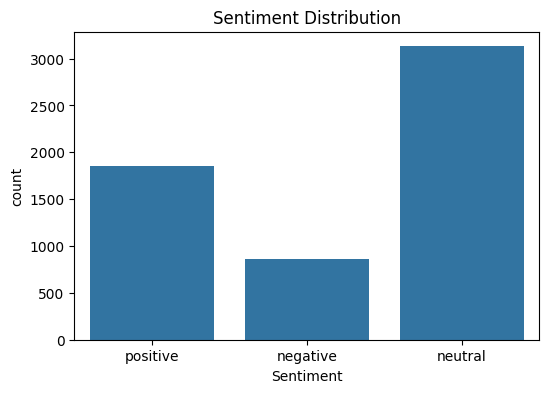

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Sentiment'])
plt.title("Sentiment Distribution")
plt.savefig("sentiment_dist.png")

In [9]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['Sentiment'])

In [10]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['Sentence']).toarray()
y = df['label_encoded']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print("Training Naive Bayes...")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

Training Naive Bayes...


In [13]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.69803250641574
              precision    recall  f1-score   support

           0       0.78      0.08      0.15       175
           1       0.69      0.95      0.80       622
           2       0.73      0.56      0.63       372

    accuracy                           0.70      1169
   macro avg       0.73      0.53      0.53      1169
weighted avg       0.71      0.70      0.65      1169



In [14]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [15]:
ann_model = Sequential()
ann_model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(3, activation='softmax'))


c:\Users\FBC\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train_cat, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5602 - loss: 0.9337
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7402 - loss: 0.6002
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8346 - loss: 0.3683
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8774 - loss: 0.2489
Epoch 5/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8969 - loss: 0.1906
Epoch 6/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9020 - loss: 0.1635
Epoch 7/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9054 - loss: 0.1500
Epoch 8/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9039 - loss: 0.1388
Epoch 9/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9052 - loss: 0.1324
Epoch 10/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9108 - loss: 0.1285


In [17]:
joblib.dump(nb_model, 'models/nb_sentiment_model.pkl')
joblib.dump(tfidf, 'models/tfidf_vectorizer.pkl')
joblib.dump(le, 'models/label_encoder.pkl')
ann_model.save('models/ann_sentiment_model.h5')
print("Sentiment Engine Trained & Saved.")

Sentiment Engine Trained & Saved.


In [18]:
import sys
print(sys.executable)
print(sys.version)


c:\Users\FBC\AppData\Local\Programs\Python\Python313\python.exe
3.13.3 (tags/v3.13.3:6280bb5, Apr  8 2025, 14:47:33) [MSC v.1943 64 bit (AMD64)]
